In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nozzle import Spectral, Params, Nozzle, Boundary
from scipy.integrate import simpson
from scipy.signal import find_peaks

# SINE

/tmp/ipykernel_5785/1990412153.py:54: RuntimeWarning: divide by zero encountered in divide
  peaks = find_peaks(np.abs(nozzle.V[:,i].real/nozzle.V[:,i].real.max()), prominence=0.1, width=(None,nozzle.x.size//2))[0]
/tmp/ipykernel_5785/1990412153.py:54: RuntimeWarning: invalid value encountered in divide
  peaks = find_peaks(np.abs(nozzle.V[:,i].real/nozzle.V[:,i].real.max()), prominence=0.1, width=(None,nozzle.x.size//2))[0]


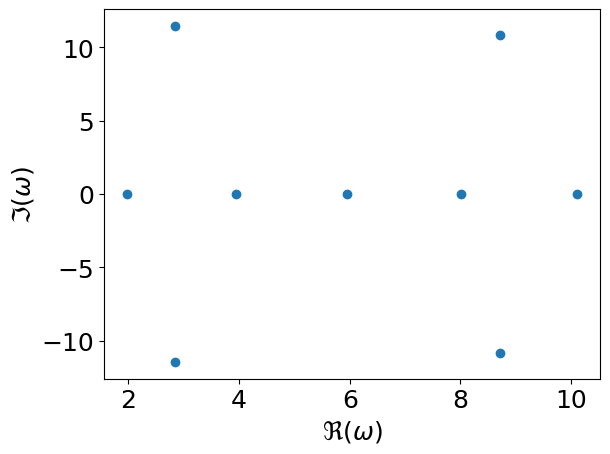

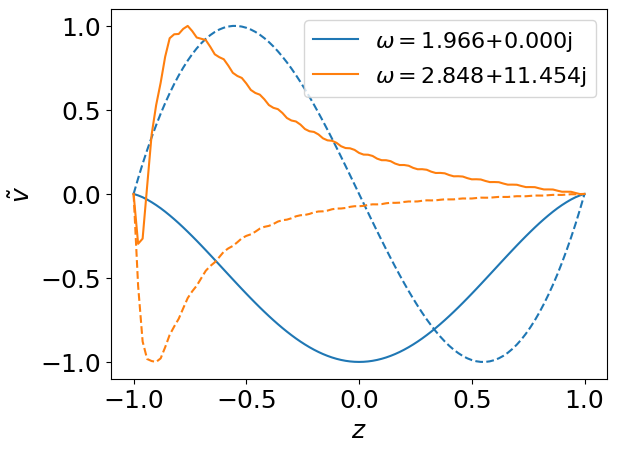

In [41]:
N = 50 # number of sine basis
M = 101 # number of points
Mm = 1.5
constant_v = True
accelerating = False
boundary = Boundary.FIXED_FIXED
params = Params(Mm, constant_v, accelerating, boundary)

spectral = Spectral(M, "symmetric", "FD")
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

nozzle = Nozzle(params, x, lambda x,n: u(x,n))
v0 = nozzle.v0

L = 2
x0 = -1
u = lambda x,n: np.sqrt(2/L)*np.sin(n*np.pi/L*(x-x0))

# A2 = np.eye(N,dtype=complex)
A2 = np.zeros((N,N),dtype=complex)
A1 = np.zeros((N,N),dtype=complex)
A0 = np.zeros((N,N),dtype=complex)
for i in range(1,N+1):
    for j in range(1,N+1):
        A2[i-1,j-1] = simpson(u(x,i)*u(x,j),x=x)
        A1[i-1,j-1] = 2j*simpson(u(x,i)*v0*(D1@u(x,j)) + u(x,i)*(D1@v0)*u(x,j),x=x)
        A0[i-1,j-1] = simpson(
            u(x,i)*(1-v0**2)*(D2@u(x,j)) -
            u(x,i)*(3*v0+1/v0)*(D1@v0)*(D1@u(x,j)) - 
            u(x,i)*(1-1/v0**2)*(D1@v0)**2*u(x,j) -
            u(x,i)*(v0+1/v0)*(D2@v0)*u(x,j),
            x=x)
        

C, nozzle.omega = nozzle.solve(A0,A1,A2)
nozzle.V = np.zeros((x.size, C.shape[1]),dtype=complex)
selection = (nozzle.omega.real >= 0) & (
    nozzle.omega.real <= 11
)
C = C[:, selection]
nozzle.omega = nozzle.omega[selection]
nozzle.V = nozzle.V[:, selection]
ind = np.argsort(nozzle.omega.real)
C = C[:, ind]
nozzle.omega = nozzle.omega[ind]
nozzle.V = nozzle.V[:, ind]
del_ind = []
for i in range(C.shape[1]):
    for n in range(N):
        nozzle.V[:, i] += C[n,i]*u(x, n)
    zeros = np.isclose(nozzle.V[:,i].real,0).nonzero()[0]
    peaks = find_peaks(np.abs(nozzle.V[:,i].real/nozzle.V[:,i].real.max()), prominence=0.1)[0]
    if (
        (zeros.size > nozzle.x.size//3) # decayed wave
        or ((peaks < nozzle.x.size//2).all()) # all peaks on the left
        or ((peaks > nozzle.x.size//2).all()) # all peaks on the right
        or (peaks.size > nozzle.x.size//3) # high k
    ):
        del_ind.append(i)
nozzle.omega = np.delete(nozzle.omega, del_ind)
nozzle.V = np.delete(nozzle.V, del_ind, axis=1)
nozzle.sort_solutions(real_range=[0,11])

nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions(num_funcs=2)
# nozzle.save_data("SE", N=N)


<Axes: xlabel='$z$', ylabel='$\\tilde{v}$'>

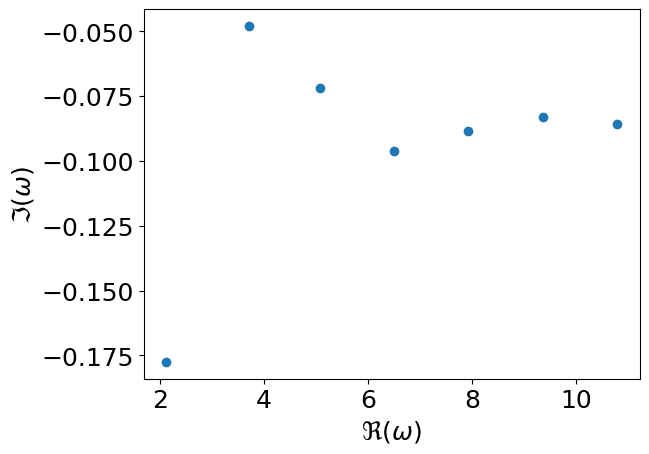

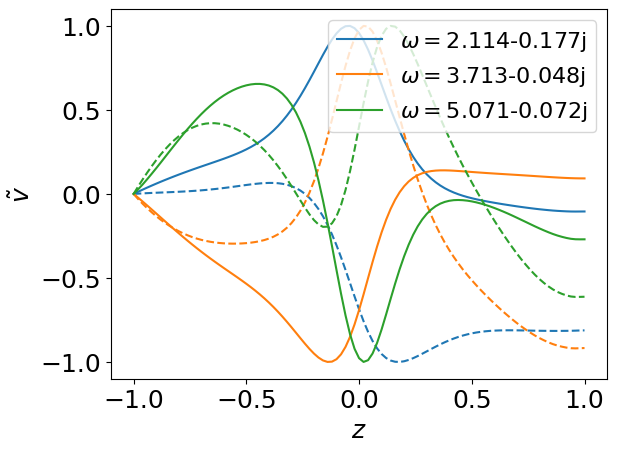

In [53]:
N = 50 # number of sine basis
M = 101 # number of points
Mm = 0.5
constant_v = False
accelerating = False
boundary = Boundary.FIXED_OPEN
params = Params(Mm, constant_v, accelerating, boundary)

spectral = Spectral(M, "symmetric", "FD")
x = spectral.x
D1 = spectral.D1
D2 = spectral.D2

nozzle = Nozzle(params, x, lambda x,n: u(x,n))
v0 = nozzle.v0

u = lambda x,n: np.sin((2*n+1)*np.pi/4*(x+1))

# A2 = np.eye(N,dtype=complex)
A2 = np.zeros((N,N),dtype=complex)
A1 = np.zeros((N,N),dtype=complex)
A0 = np.zeros((N,N),dtype=complex)
for i in range(1,N+1):
    for j in range(1,N+1):
        A2[i-1,j-1] = simpson(u(x,i)*u(x,j),x=x)
        A1[i-1,j-1] = 2j*simpson(u(x,i)*v0*(D1@u(x,j)) + u(x,i)*(D1@v0)*u(x,j),x=x)
        A0[i-1,j-1] = simpson(
            u(x,i)*(1-v0**2)*(D2@u(x,j)) -
            u(x,i)*(3*v0+1/v0)*(D1@v0)*(D1@u(x,j)) - 
            u(x,i)*(1-1/v0**2)*(D1@v0)**2*u(x,j) -
            u(x,i)*(v0+1/v0)*(D2@v0)*u(x,j),
            x=x)
        

C, nozzle.omega = nozzle.solve(A0,A1,A2)
nozzle.V = np.zeros((x.size, C.shape[1]),dtype=complex)
selection = (nozzle.omega.real >= 0) & (
    nozzle.omega.real <= 11
)
C = C[:, selection]
nozzle.omega = nozzle.omega[selection]
nozzle.V = nozzle.V[:, selection]
ind = np.argsort(nozzle.omega.real)
C = C[:, ind]
nozzle.omega = nozzle.omega[ind]
nozzle.V = nozzle.V[:, ind]
del_ind = []
for i in range(C.shape[1]):
    for n in range(N):
        nozzle.V[:, i] += C[n,i]*u(x, n)
    # zeros = np.isclose(nozzle.V[:,i].real,0).nonzero()[0]
    # peaks = find_peaks(np.abs(nozzle.V[:,i].real/nozzle.V[:,i].real.max()), prominence=0.1)[0]
    # if (
    #     (zeros.size > nozzle.x.size//3) # decayed wave
    #     or ((peaks < nozzle.x.size//2).all()) # all peaks on the left
    #     or ((peaks > nozzle.x.size//2).all()) # all peaks on the right
    #     or (peaks.size > nozzle.x.size//3) # high k
    # ):
    #     del_ind.append(i)
nozzle.omega = np.delete(nozzle.omega, del_ind)
nozzle.V = np.delete(nozzle.V, del_ind, axis=1)
nozzle.sort_solutions(real_range=[0,11])

nozzle.plot_eigenvalues()
nozzle.plot_eigenfunctions(num_funcs=3)

In [57]:
nozzle.V[:,3]

array([ 0.        +0.j        ,  0.13106256+0.06335295j,
        0.26335053+0.11973037j,  0.39630767+0.16644353j,
        0.52766297+0.20450945j,  0.65501491+0.2349602j ,
        0.77688875+0.25724335j,  0.892197  +0.27079786j,
        0.99935391+0.27632454j,  1.09655627+0.27485135j,
        1.18263503+0.26666872j,  1.25695893+0.25193625j,
        1.31865565+0.23158474j,  1.36664683+0.20686172j,
        1.40042633+0.17848593j,  1.42009319+0.14694081j,
        1.42557414+0.11321569j,  1.41652604+0.07856486j,
        1.39308578+0.04378178j,  1.3559645 +0.00934505j,
        1.30563422-0.02390992j,  1.24213494-0.05488756j,
        1.16583431-0.08286991j,  1.07759021-0.10744737j,
        0.97791759-0.12786874j,  0.86674795-0.14302116j,
        0.74425945-0.15200239j,  0.61116263-0.15410874j,
        0.46789772-0.14820271j,  0.31439944-0.13261624j,
        0.15105156-0.10570515j, -0.02085789-0.06593102j,
       -0.19988155-0.01130058j, -0.3846361 +0.06071757j,
       -0.57272897+0.15254443j,